In [8]:
import numpy as np
import pytest

%matplotlib notebook
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit

## Write a function that returns a normalized Gaussian

The normalized Gaussian is given by 

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},
$$

where $\mu$ is the position of the center of the distribution and $\sigma$ is the standard deviation of the Gaussian.

In [1]:
def gauss(x, mu, sigma):
    norm = 1/np.sqrt(2 * np.pi * sigma ** 2) 
    return norm * np.exp(-(x - mu)**2 / (2 * sigma ** 2))

## Write three "tests" for your Gaussian function 
### Names are in the cell below, two example are given


In [9]:
def test_gauss_value_at_mu():
    """
    The value of the Gaussian at ``x=mu`` should be $1/sqrt(2 * pi * sigma**2)$; check
    that that is the case for a couple non-zero values of sigma to within a tolerance.
    """
    # Nothing particularly special about this value of tolerance
    tolerance = 1e-8
    
    # choose x and mu; they need to be the same for this test
    x = 4
    mu = 4
    sig1 = 2.3
    norm1 = 1/np.sqrt(2 * np.pi * sig1 ** 2)
    assert np.abs(gauss(x, mu, sig1) - norm1) <= tolerance

    
def test_gauss_sigma_zero_raises_error():
    """
    Using a sigma=0 should cause a division by zero error. Make sure that it does.
    """
    
    x = 2
    mu = 1
    sigma = 0
    
    with pytest.raises(ZeroDivisionError):
        gauss(x, mu, sigma)

In [10]:
test_gauss_value_at_mu()
test_gauss_sigma_zero_raises_error()

/Users/mattcraig/anaconda3/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


## Write a function that fits a Gaussian (normal) to data

The function should be called `fit_gauss`, and it should return the fit values of $\mu$ and $\sigma$, along with the uncertainties in those values. Return $\mu$ and $\sigma$ as a list; return the uncertainties in a separate list.

## Generate a couple of normal distributions

Generate distributions (using the appropariate function from `numpy.random` for these value, representing two measured distances:

+ $x_1 = 3.2 \pm 0.01$ meter
+ $x_2 = 1.6 \pm 0.02$ meter

Use 1000 points in each of the distributions.

In a moment, we'll combine the two of these and check the error in the result.

### Fit a gaussian to one of your values ($x_1$ or $x_2$) and check...

...that the values from the fit are consistent with the $\mu$ and $\sigma$ with which you created the distribution.

You will need to create a histogram of your distrubtion and fit the Gaussian to that histogram.

### Calculate by hand the expected uncertainty when you add the values above

In other words, what is the uncertainty in $x_1 + x_2$?

### Calculate the sum on the computer, make a histogram of the result and fit a Gaussian to it

### Compare the value from your fit to the expected error you calculated by hand

In [90]:
g1 = np.random.normal(loc=5, scale=0.4, size=10000)

In [91]:
g1.min()

3.3018597224536133

In [92]:
g2 = np.random.normal(loc=7, scale=0.4, size=10000)

<IPython.core.display.Javascript object>


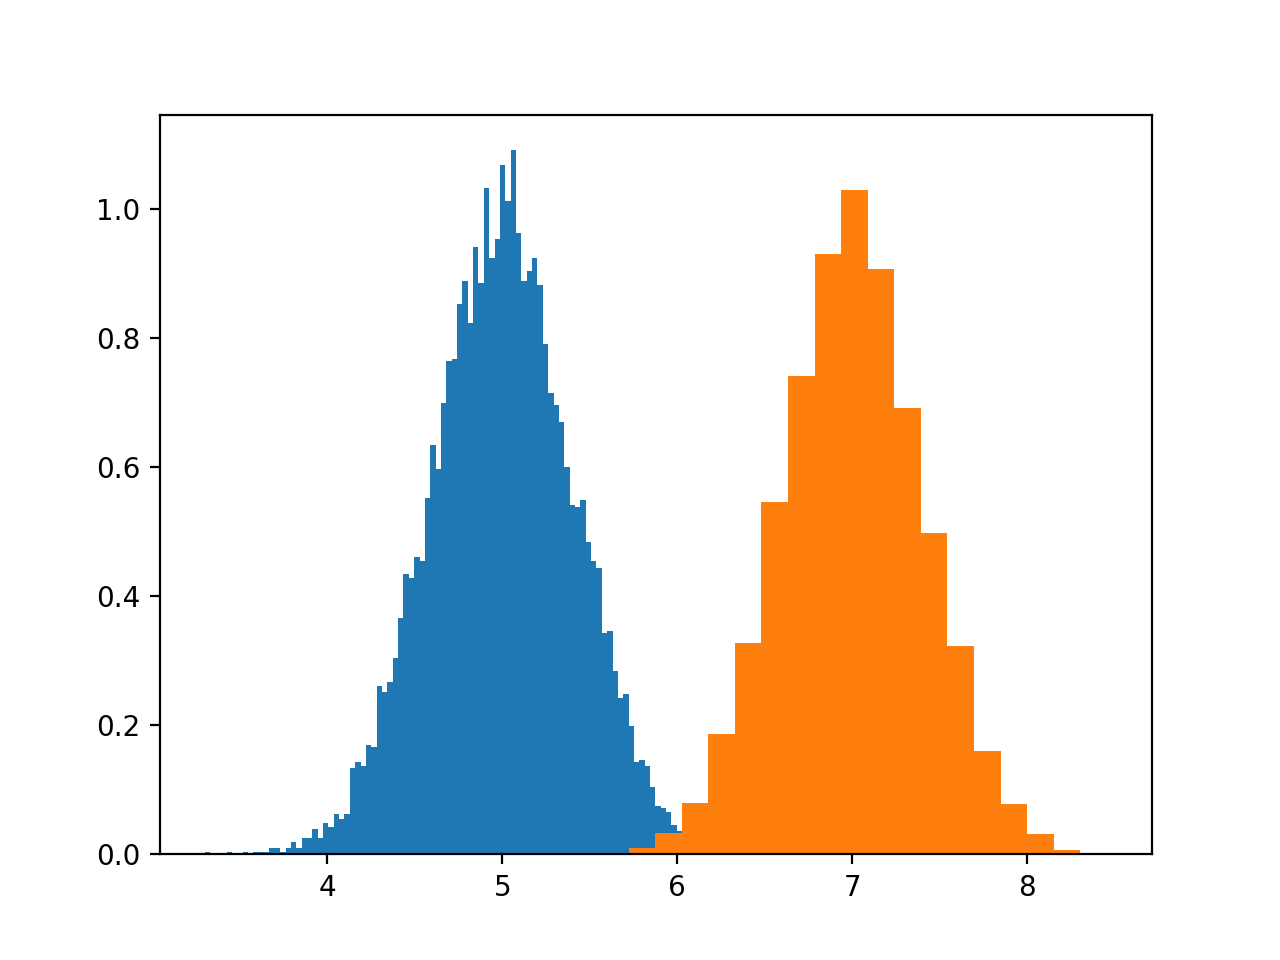

In [93]:
plt.figure()
hist, bins1, patches = plt.hist(g1, bins=100, density=True)
plt.hist(g2, bins=20, density=True);

In [30]:
def gaussian_to_fit(x, loc, scale):
    return np.exp(-(x - loc)**2 / (2 * scale**2)) / np.sqrt(2 * np.pi * scale ** 2)

<IPython.core.display.Javascript object>


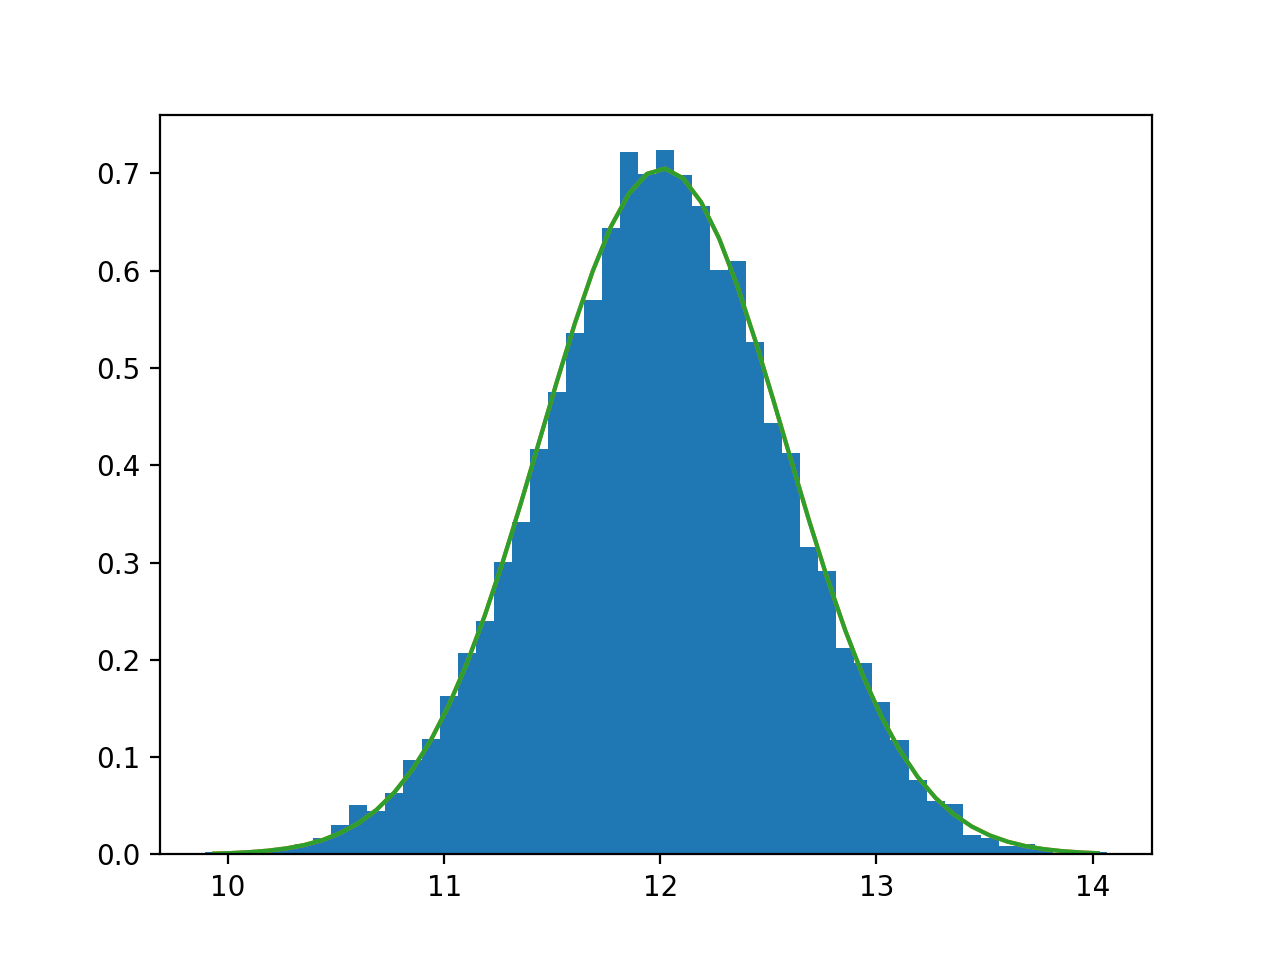

In [94]:
plt.figure()
hist_sum, bin_sum, patch_sum = plt.hist(g1 + g2, bins=50, density=True)

In [96]:
cbin_sum = (bin_sum[:-1] + bin_sum[1:]) / 2
fit_params_sum, covar_sum = curve_fit(gaussian_to_fit, cbin_sum, hist_sum, p0=[12, 0.1])
print(fit_params_sum)
plt.plot(cbin_sum, gaussian_to_fit(cbin_sum, *fit_params_sum))

[ 12.00919608   0.56577044]


In [98]:
cbin = (bins1[:-1] + bins1[1:]) / 2
fit_params1, covar1 = curve_fit(gaussian_to_fit, cbin, hist, p0=[5, 0.4])

In [99]:
fit_params1

array([ 5.00108738,  0.40454702])

<IPython.core.display.Javascript object>


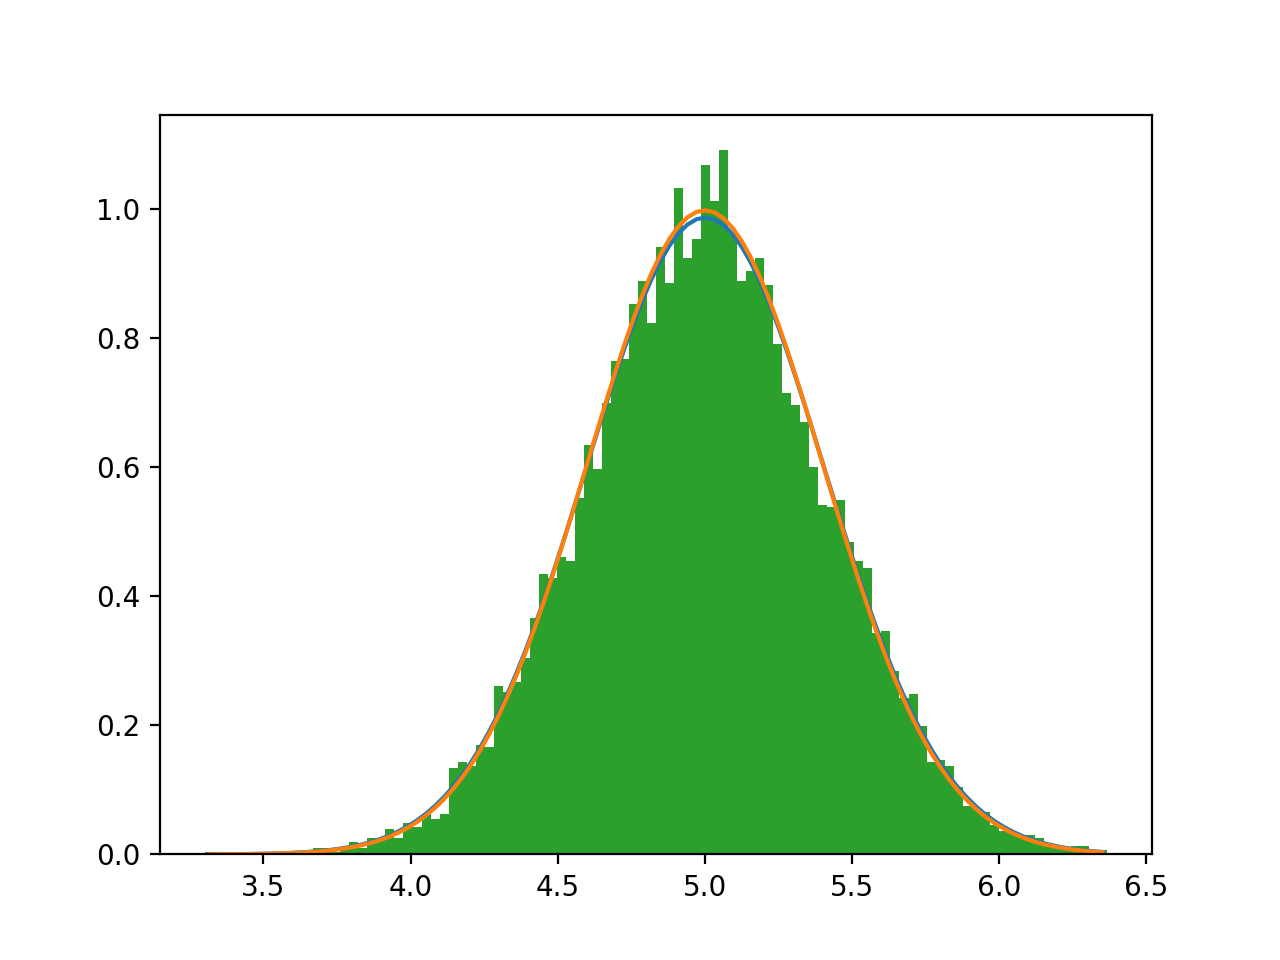

In [100]:
plt.figure()
plt.plot(cbin, gaussian_to_fit(cbin, *fit_params1), label='crappiest crap that ever crapped')
plt.plot(cbin, gaussian_to_fit(cbin, 5, 0.4), label='Using input params')
plt.hist(g1, bins=100, density=True);

In [ ]:
print(hist)

In [101]:
even_dist = np.random.random(size=[1000, 100000])
even_sum = even_dist.sum(axis=1)

<IPython.core.display.Javascript object>


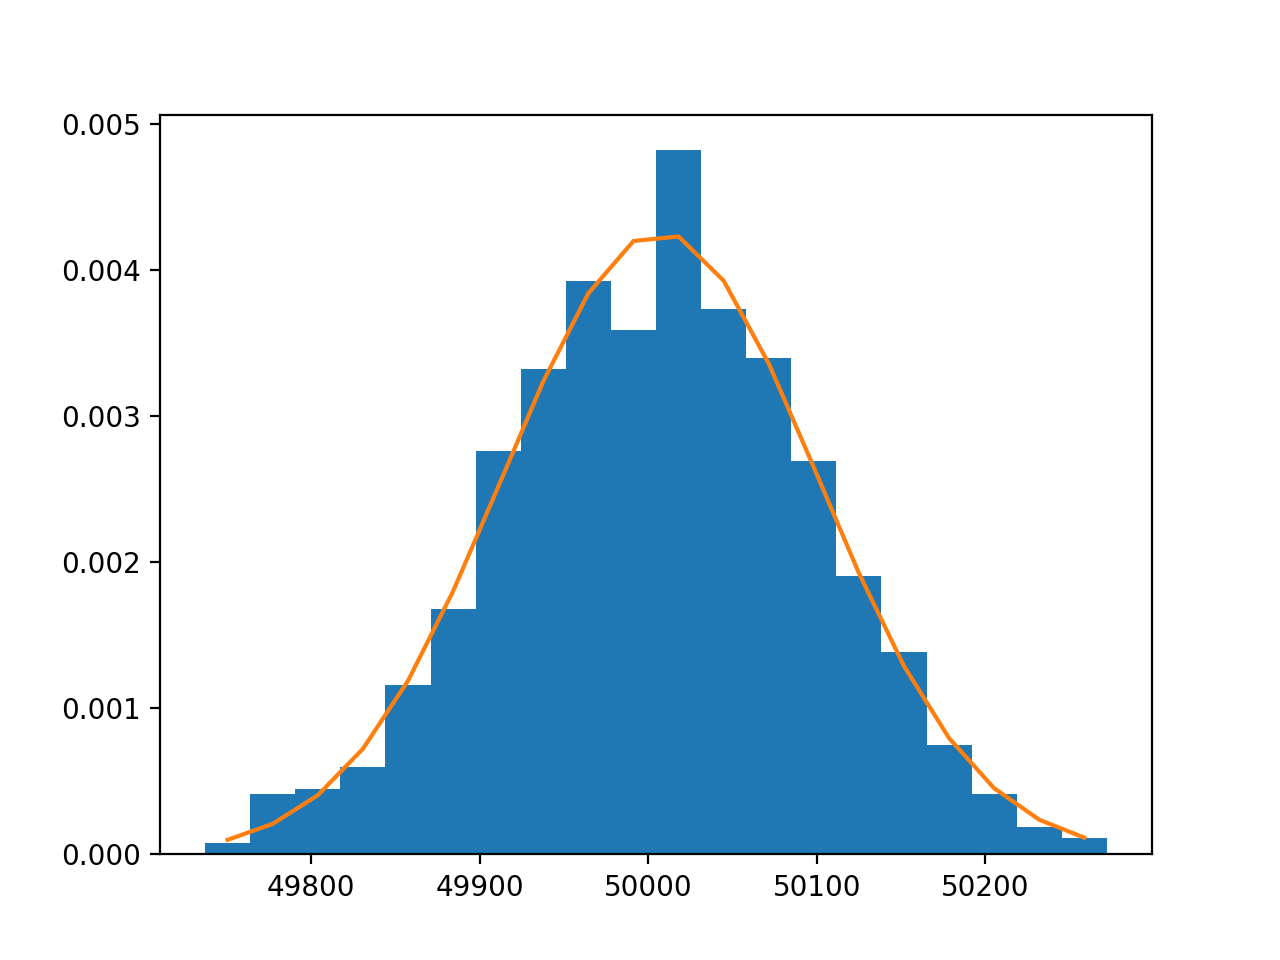

In [102]:
plt.figure()
hist_s, bins_s, cov_s = plt.hist(even_sum, bins=20, density=True)

In [104]:
cbin_s = (bins_s[:-1] + bins_s[1:]) / 2
fit_params_s, covar_s = curve_fit(gaussian_to_fit, cbin_s, hist_s, p0=[50000, 100])

In [105]:
fit_params_s

array([ 50006.91746296,     93.62336832])

In [106]:
plt.plot(cbin_s, gaussian_to_fit(cbin_s, *fit_params_s))